In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py

In [38]:
Nbar=np.loadtxt(f"dphi0_no_sa/Nbar.csv")
n_param=len(Nbar)
with h5py.File("dphi0_no_sa/coord.h5", 'r+') as f:
    umb_field=np.array(f["umbrella_field"])
n_target=len(umb_field[umb_field>0])
print(n_target)
var_phi=0.0422 #composition variance in boundary zone for homogeneous system

3200


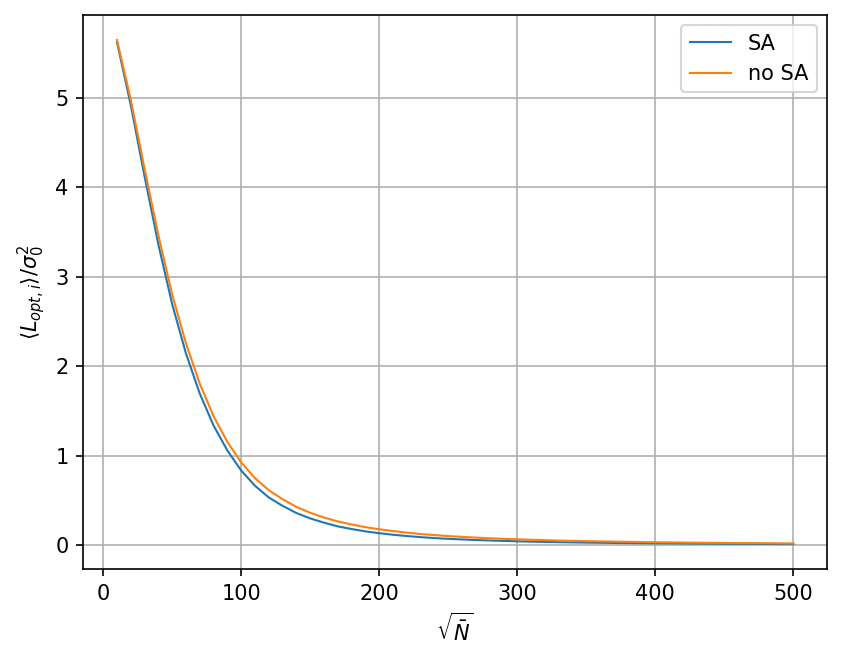

In [41]:
plt.figure(dpi=150)
plt.grid()
plt.xlabel(r"$\sqrt{\bar N}$")
plt.ylabel(r"$\langle L_{opt,i}\rangle/\sigma^2_0$")
dphi="dphi0"
directory_sa=dphi+"_sa"
directory_no_sa=dphi+"_no_sa"
#number of different parameters
opt_sa=np.loadtxt(f"{directory_sa}/opt.csv")/n_target
flips_sa=np.loadtxt(f"{directory_sa}/flips.csv")
#number of simulations per parameter
n_sim=int(len(opt_sa)/n_param)
opt_no_sa=np.loadtxt(f"{directory_no_sa}/opt.csv")/n_target
flips_no_sa=np.loadtxt(f"{directory_no_sa}/flips.csv")
#reshape arrays
opt_sa=opt_sa.reshape(n_param,n_sim).mean(axis=1)
opt_no_sa=opt_no_sa.reshape(n_param,n_sim).mean(axis=1)
flips_sa=flips_sa.reshape(n_param,n_sim).mean(axis=1)
flips_no_sa=flips_no_sa.reshape(n_param,n_sim).mean(axis=1)
plt.plot(Nbar,opt_sa/var_phi,label="SA",lw=1)
plt.plot(Nbar,opt_no_sa/var_phi,label="no SA",lw=1)
plt.legend()
plt.savefig(f"opt_var_nbar_{dphi}.pdf")

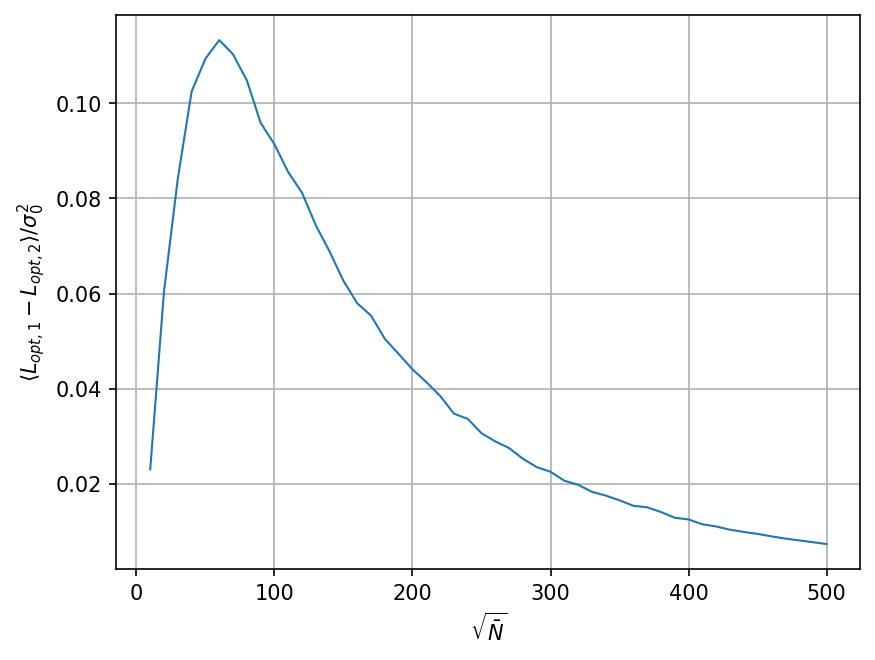

In [42]:
plt.figure(dpi=150)
plt.grid()
plt.xlabel(r"$\sqrt{\bar N}$")
plt.ylabel(r"$\langle L_{opt,1}-L_{opt,2}\rangle/\sigma^2_0$")
plt.plot(Nbar,(opt_no_sa-opt_sa)/var_phi,lw=1)
plt.savefig(f"diff_var_nbar_{dphi}.pdf")

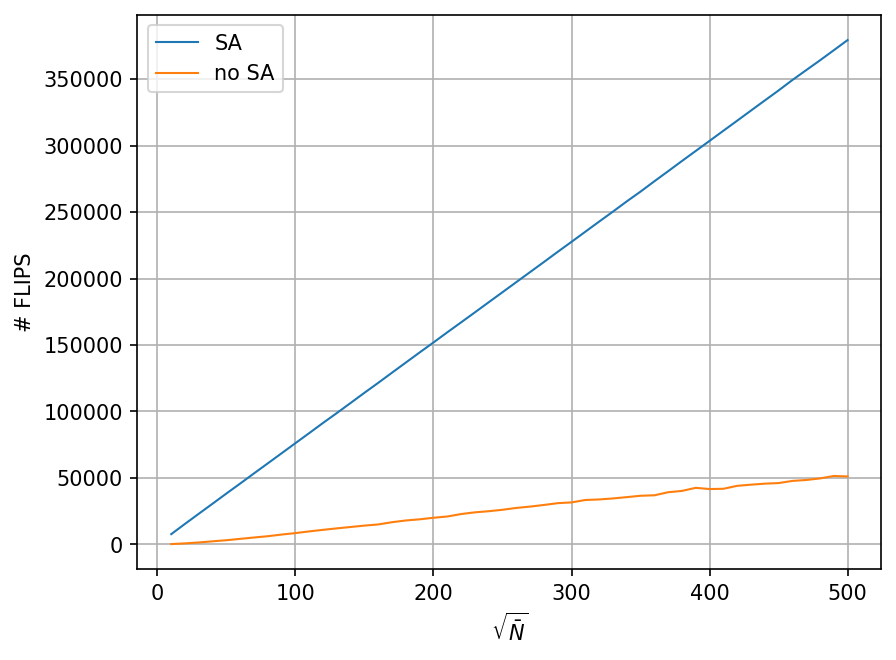

In [43]:
plt.figure(dpi=150)
plt.grid()
plt.ylabel("# FLIPS")
plt.xlabel(r"$\sqrt{\bar N}$")
plt.plot(Nbar,flips_sa,lw=1,label="SA")
plt.plot(Nbar,flips_no_sa,lw=1,label="no SA")
plt.legend()
plt.savefig(f"flips_var_nbar_{dphi}.pdf")